In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml

import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters


% matplotlib inline

In [2]:
dataDrive = "/Volumes/DataCenter/"
dataLocation = "neosimData/ldm156/fullsky5year.db"
subsampleLocation = "neosimData/ldm156_subsample/"

In [3]:
con = sql.connect(dataDrive + dataLocation)

In [4]:
full = pd.read_sql_query("""
SELECT * FROM withAstromErr
ORDER BY RANDOM()
LIMIT 10000
""", con)

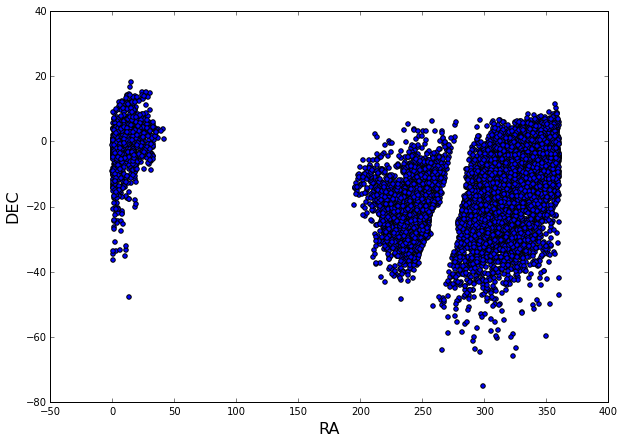

In [5]:
MopsPlotter.plotDataframe(full)

In [6]:
mjd = [51029,51065]
ra = [300,302]
dec = [-20,-18]
nights = mjd[1]-mjd[0]

In [7]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM noAstromErr
WHERE (mjd BETWEEN %f AND %f) AND (dec BETWEEN %f and %f) AND (ra BETWEEN %f AND %f)
""" % (mjd[0], mjd[1], dec[0], dec[1], ra[0], ra[1]), con)

In [8]:
len(ssmids['ssmid'])

6017

In [9]:
obj_num = 1

In [10]:
num_ssm = random.sample(ssmids['ssmid'], obj_num)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [11]:
objs = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE ssmid IN %s
""" % (sample), con, index_col='diaid')

In [12]:
objs

,obshistid,ssmid,ra,dec,mjd,mag,snr
diaid,,,,,,,
1140207,88653381,1258850,303.498024,-19.137385,51030.312018,22.107197,5.340861
5098702,88669958,1258850,302.382353,-19.227845,51036.208600,22.268522,17.123843
11339006,88682095,1258850,301.528137,-19.286978,51041.193663,22.498495,49.446109
11547117,88682213,1258850,301.524962,-19.287152,51041.212581,22.498916,46.417677
11826775,88682394,1258850,301.519126,-19.287461,51041.247500,22.499695,34.154817
12046235,88682529,1258850,301.515309,-19.287658,51041.270470,22.500207,30.230630
16875004,88688741,1258850,301.076026,-19.313326,51044.107844,22.561369,39.053738
17082037,88688895,1258850,301.072427,-19.313510,51044.130977,22.561866,36.410249
18189538,88690033,1258850,300.929060,-19.320899,51045.110928,22.582592,32.276997


In [13]:
subsampleData = dataDrive + subsampleLocation + "subsampledata.txt"

In [14]:
objs.to_csv(subsampleData, sep=" ", header=False, index='diaid')

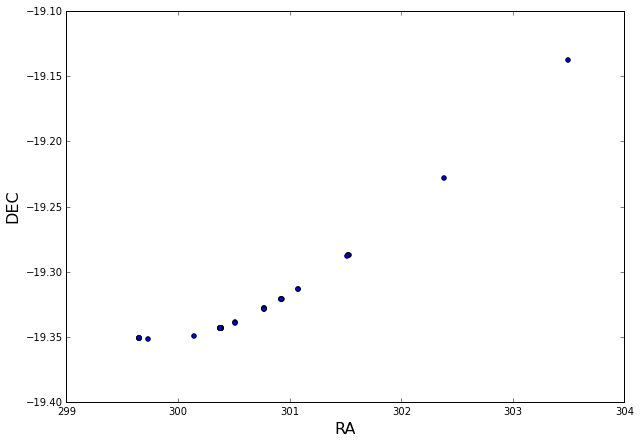

In [15]:
MopsPlotter.plotDataframe(objs)

In [16]:
! rm -rf {dataDrive + subsampleLocation}/nightly/
! rm -rf {dataDrive + subsampleLocation}/obshist/
! mkdir {dataDrive + subsampleLocation}/nightly
! mkdir {dataDrive + subsampleLocation}/obshist

In [17]:
! python $MOPS_DIR/bin/splitByNight.py /Volumes/DataCenter/neosimData/ldm156_subsample/subsampledata.txt /Volumes/DataCenter/neosimData/ldm156_subsample/nightly/ /Volumes/DataCenter/neosimData/ldm156_subsample/obshist/

In [18]:
! rm -rf {dataDrive + subsampleLocation}/subsampleRun

In [19]:
! python runMops.py {dataDrive + subsampleLocation}/nightly {dataDrive + subsampleLocation}/subsampleRun

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension accel

In [20]:
parameters = yaml.load(file(dataDrive + subsampleLocation + "subsampleRun/parameters.yaml", "r"))
tracker = yaml.load(file(dataDrive + subsampleLocation + "subsampleRun/tracker.yaml", "r"))

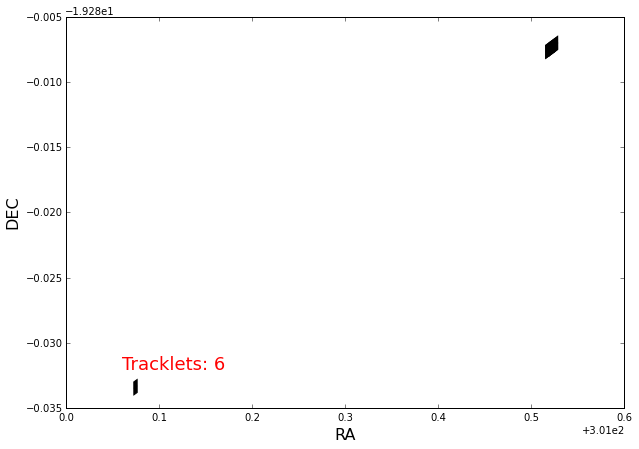

In [21]:
MopsPlotter.plotTracklets(tracker.diaSources[2:4], tracker.tracklets[2:4])

ValueError: First argument must be a sequence

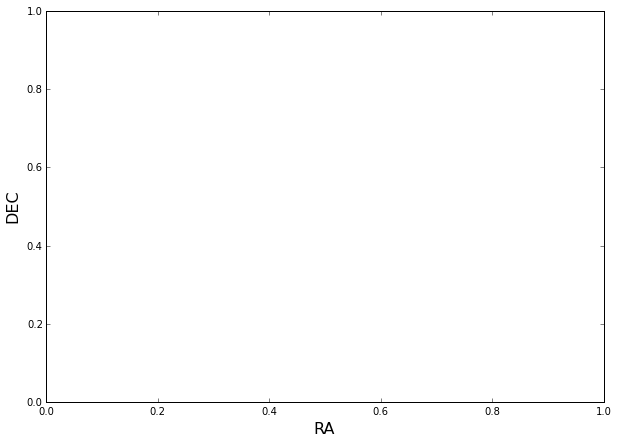

In [64]:
MopsPlotter.plotTracklets(tracker.diaSources[4], tracker.tracklets[4])

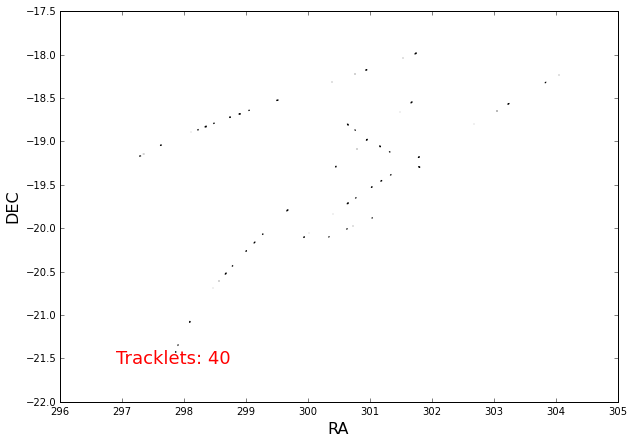

In [40]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.collapsedTrackletsById)

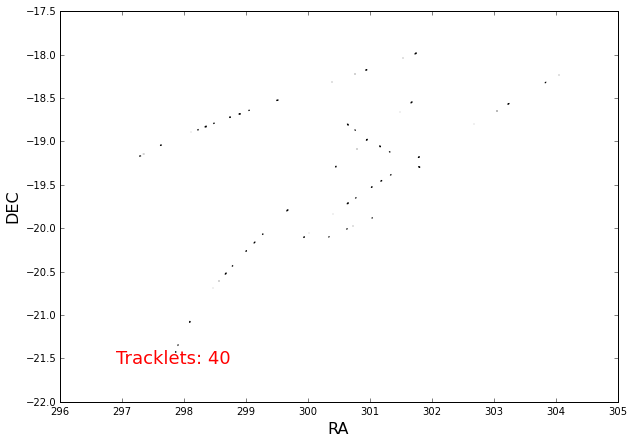

In [41]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.purifiedTrackletsById)

In [42]:
tracker.diaSources[0]

'/Volumes/DataCenter/neosimData/ldm156_subsample/nightly/51029.dias'

ValueError: First argument must be a sequence

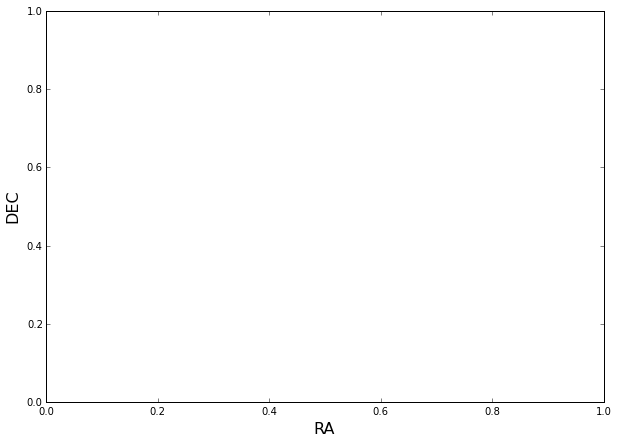

In [43]:
MopsPlotter.plotTracklets(tracker.diaSources[0], tracker.finalTrackletsById[0])

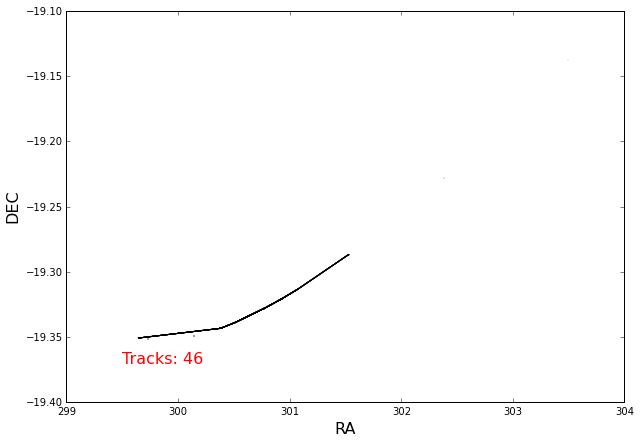

In [22]:
MopsPlotter.plotTracks(tracker.dets, tracker.tracks)

In [23]:
import MopsAnalysis

In [24]:
analysis = MopsAnalysis.runAnalysis(parameters, tracker)

Starting analysis for 51030.tracklets at Mon Jan 25 12:58:49 2016
Writing results to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracklets/51030.tracklets.results
Finished analysis for 51030.tracklets at Mon Jan 25 12:58:49 2016

Starting analysis for 51036.tracklets at Mon Jan 25 12:58:49 2016
Writing results to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracklets/51036.tracklets.results
Finished analysis for 51036.tracklets at Mon Jan 25 12:58:49 2016

Starting analysis for 51041.tracklets at Mon Jan 25 12:58:49 2016
Writing results to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracklets/51041.tracklets.results
Finished analysis for 51041.tracklets at Mon Jan 25 12:58:49 2016

Starting analysis for 51044.tracklets at Mon Jan 25 12:58:49 2016
Writing results to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracklets/51044.tracklets.results
Finished analysis for 51044.tracklets at Mon Jan 25 12:58:49 2016

Starting ana

In [25]:
analysis.startTime

'Mon Jan 25 12:58:49 2016'

In [26]:
analysis.nights

['51030',
 '51036',
 '51041',
 '51044',
 '51045',
 '51046',
 '51048',
 '51049',
 '51051',
 '51055',
 '51056']

In [27]:
analysis.falseTracksSample

{'51030-51045': [],
 '51036-51051': [],
 '51041-51056': [],
 '51044-51056': [],
 '51045-51056': [],
 '51046-51056': [],
 '51048-51056': [],
 '51049-51056': [],
 '51051-51056': []}

In [28]:
analysis.falseTracksSample

{'51030-51045': [],
 '51036-51051': [],
 '51041-51056': [],
 '51044-51056': [],
 '51045-51056': [],
 '51046-51056': [],
 '51048-51056': [],
 '51049-51056': [],
 '51051-51056': []}

In [29]:
analysis.falseTracklets

{'51030': 0,
 '51036': 0,
 '51041': 0,
 '51044': 0,
 '51045': 0,
 '51046': 0,
 '51048': 0,
 '51049': 0,
 '51051': 0,
 '51055': 0,
 '51056': 0}

In [30]:
analysis.trueFinalTracklets

{'51030': 0,
 '51036': 0,
 '51041': 1,
 '51044': 1,
 '51045': 1,
 '51046': 1,
 '51048': 1,
 '51049': 1,
 '51051': 0,
 '51055': 0,
 '51056': 1}

In [75]:
print analysis.totalTracklets
print analysis.trueTracklets
print analysis.falseTracklets
print float(analysis.trueTracklets)/analysis.totalTracklets

{'51056': 3, '51036': 3, '51051': 0, '51049': 46, '51048': 12, '51041': 50, '51046': 15, '51045': 59, '51044': 6}
{'51056': 3, '51036': 3, '51051': 0, '51049': 46, '51048': 12, '51041': 50, '51046': 15, '51045': 59, '51044': 6}
{'51056': 0, '51036': 0, '51051': 0, '51049': 0, '51048': 0, '51041': 0, '51046': 0, '51045': 0, '51044': 0}


TypeError: float() argument must be a string or a number

In [ ]:
print analysis.totalCollapsedTracklets
print analysis.trueCollapsedTracklets
print analysis.falseCollapsedTracklets
print float(analysis.trueCollapsedTracklets)/analysis.totalCollapsedTracklets

In [ ]:
# The few cells above will be cleaned up and implemented as part of the analysis run. 

In [ ]:
sorted([3,4,5])

In [ ]:
def findNearbyDetections(dataframe, ra, dRa, dec, dDec, mjd, number):
    min_ra = ra - dRa
    max_ra = ra + dRa
    min_dec = dec - dDec
    max_dec = dec + dDec
    
    print "Looking for %s objects between RA: %s and %s, Dec: %s and %s." % (number, min_ra, max_ra, min_dec, max_dec)
    
    sample = objs[(objs['ra'] > min_ra) & (objs['ra'] < max_ra) & (objs['dec'] > min_dec) & (objs['dec'] < max_dec)].sample(number)

    
    return sample
    

In [ ]:
fig, ax = plt.subplots(1,1)
ax.scatter(sample.ra, sample.dec)
ax.set_aspect('equal', 'datalim')
plotVelocityRange(ax, 301, -18, 0.3)

In [ ]:
sample = findNearbyDetections(objs, 301, 1, -18, 1, 51029, 100)

In [ ]:
ra += ra * 0.01

In [ ]:
ra

In [ ]:
import random

In [ ]:
objs[(objs['ra'] > 300.0) & (objs['ra'] < 301.0) & (objs['dec'] > -20.0) & (objs['dec'] < -19.0)]['ssmid']

In [ ]:
int(51023.931)

In [ ]:
from matplotlib import animation

In [ ]:
animation

In [ ]:
def plotVelocityRange(ax, ra_center, dec_center, vmax):
    vrange = plt.Circle((ra_center, dec_center), vmax, color='k', fill=False)
    ax.add_artist(vrange)

In [ ]:
MopsAnalysis.countFindableSSMIDs(ssmids, 0)

In [ ]:
! ls /Users

In [ ]:
t = np.array([3,2,4,2])

In [ ]:
t[1:]

In [4]:
a =set([1,2,3,3])

In [3]:
set.issubset

<method 'issubset' of 'set' objects>

In [5]:
b = set([1,2,3])

In [6]:
b.issubset(a)

True

In [7]:
a = set()

In [9]:
a.add(2)

In [10]:
a

{2}

In [11]:
from MopsObjects import track

In [12]:
b = track(2)

In [14]:
a.add(b)

In [15]:
a

{2, <MopsObjects.track at 0x1094e4110>}

In [16]:
a.remove(2)

In [17]:
a

{<MopsObjects.track at 0x1094e4110>}

In [28]:
b = track(2)

In [19]:
c = track(3)

In [29]:
a.add(c)

In [21]:
a

{<MopsObjects.track at 0x1094e4110>, <MopsObjects.track at 0x1094e4290>}

In [30]:
d = set([b])

In [31]:
d

{<MopsObjects.track at 0x1094e4590>}

In [36]:
b.issubset(a)

AttributeError: 'track' object has no attribute 'issubset'

In [43]:
a = np.array([])

In [44]:
a.append([2])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [80]:
import random

In [83]:
random.choice?

In [26]:
for i,j in enumerate(analysis.trueTracksSample['51036-51051'][0].diasources):
    print j.mjd

51036.192273
51036.208152
51036.2086
51036.217574
51041.188874
51041.209383
51041.243919
51041.263586
51044.107382
51044.130512


In [ ]:
def countFindableTrueTracks(dataframe, minDetectionsPerNight, minNights):
    findableTracks = 0
    
    possible_ssmids = dataframe.groupby("ssmid").filter(lambda x: len(x) >= minDetectionsPerNight*minNights)
    unique_ssmids = possible_ssmids['ssmid'].unique()
    findable_ssmids = []
    
    for unique_ssmid in unique_ssmids:
        detections = possible_ssmids[possible_ssmids["ssmid"] == unique_ssmid]
        unique, counts = np.unique(detections.sort(columns="mjd")['mjd'].unique().astype(int), return_counts=True)
        if len(counts[counts >= minDetectionsPerNight]) >= minNights:
            findableTracks += 1
            findable_ssmids.append(unique_ssmid)

    return findableTracks, findable_ssmids